In [3]:
# Importing libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [36]:
# Download prices for 5 tickers
tickers = ["AAPL", "AMZN", "META", "TSLA", "GOOGL"]

# Last 3 years of daily data (adjust as you like)
prices = yf.download(tickers, period="3y", auto_adjust="True")

# Basic sanity check
prices.tail()

[*********************100%***********************]  5 of 5 completed


KeyError: 'Adj Close'

In [11]:
# Compute daily returns

simple_ret = prices.pct_change().dropna()  # For quick summary 
log_ret = np.log(prices).diff().dropna()   # For modeling, simulations and regressions

simple_ret.head(), log_ret.head()

(Price          Close                                              High  \
 Ticker          AAPL      AMZN     GOOGL      META      TSLA      AAPL   
 Date                                                                     
 2022-10-18  0.009409  0.022585  0.008002 -0.009251  0.003829  0.026592   
 2022-10-19  0.000765 -0.011086 -0.011313  0.003238  0.008402 -0.011929   
 2022-10-20 -0.003267  0.001564  0.003413 -0.012760 -0.066474  0.006485   
 2022-10-21  0.027059  0.035315  0.011604 -0.011556  0.034543  0.013435   
 2022-10-24  0.014803  0.004190  0.013745 -0.002231 -0.014876  0.016097   
 
 Price                                               ...      Open            \
 Ticker          AMZN     GOOGL      META      TSLA  ...      AAPL      AMZN   
 Date                                                ...                       
 2022-10-18  0.046677  0.025166  0.022628  0.035879  ...  0.031332  0.081282   
 2022-10-19 -0.024515 -0.023678 -0.006094 -0.029980  ... -0.026119 -0.036536  

In [13]:
def describe_returns(df):
    out = pd.DataFrame({
        "mean": df.mean(),
        "median": df.median(),
        "std": df.std(),  # volatility
        "min": df.min(),
        "max": df.max(),
        "skew": df.skew(), # asymmetry
        "kurtosis": df.kurtosis() # Fisher definition; normal = 0
    })
    return out.sort_index()

# In pandas, kurtosis is Fisher's definition (0=normal), positive = fat tails; negative = light tails 

#summary = describe_returns(simple_ret)
summary = describe_returns(log_ret)
summary

mean    median       std       min       max      skew  \
Price  Ticker                                                               
Close  AAPL    0.000756  0.001186  0.017194 -0.097013  0.142617  0.592641   
       AMZN    0.000843  0.000423  0.020940 -0.094081  0.114915  0.105151   
       GOOGL   0.001236  0.002143  0.019726 -0.099924  0.097348 -0.163350   
       META    0.002229  0.001597  0.026431 -0.281794  0.209307 -0.324128   
       TSLA    0.000891  0.000997  0.038888 -0.167546  0.204491  0.146513   
High   AAPL    0.000759  0.001060  0.015328 -0.081861  0.075392  0.065079   
       AMZN    0.000863  0.001321  0.019056 -0.121640  0.100938 -0.052409   
       GOOGL   0.001252  0.001002  0.018285 -0.082611  0.110135  0.245513   
       META    0.002246  0.001757  0.025815 -0.279478  0.249794  0.101231   
       TSLA    0.000909 -0.001411  0.033848 -0.123749  0.181010  0.479839   
Low    AAPL    0.000763  0.001445  0.016078 -0.105049  0.078031 -0.577702   
       AMZN    0.000876  0.002096  0.019948 -0.124687  0.097243 -0.395064   
       GOOGL   0.001244  0.003310  0.018797 -0.094168  0.117319 -0.217601   
       META    0.002252  0.002738  0.025139 -0.287864  0.203005 -1.301605   
       TSLA    0.000929  0.002522  0.036109 -0.180728  0.140005 -0.292023   
Open   AAPL    0.000772  0.001031  0.017903 -0.095999  0.127657  0.125016   
       AMZN    0.000894  0.001438  0.022643 -0.151448  0.134002 -0.205208   
       GOOGL   0.001252  0.001797  0.019864 -0.072741  0.141717  0.548574   
       META    0.002277  0.001982  0.027874 -0.295611  0.214145 -0.878013   
       TSLA    0.000967 -0.001138  0.040642 -0.148535  0.146394  0.256484   
Volume AAPL   -0.001016 -0.013574  0.313573 -1.772503  1.562764  0.040223   
       AMZN   -0.000526 -0.014563  0.317808 -1.145803  1.151516  0.074386   
       GOOGL  -0.000022 -0.017980  0.339895 -1.149487  1.790403  0.360383   
       META   -0.001586 -0.015723  0.357034 -1.568648  1.367233  0.333548   
       TSLA   -0.000044 -0.019209  0.241525 -0.770872  1.066991  0.486868   

                kurtosis  
Price  Ticker             
Close  AAPL     9.375595  
       AMZN     4.209717  
       GOOGL    4.379506  
       META    27.228646  
       TSLA     2.993020  
High   AAPL     4.047912  
       AMZN     6.005504  
       GOOGL    3.962483  
       META    35.132908  
       TSLA     2.170992  
Low    AAPL     6.327483  
       AMZN     5.470217  
       GOOGL    5.256273  
       META    32.485882  
       TSLA     2.635629  
Open   AAPL     8.133450  
       AMZN     7.087743  
       GOOGL    4.958454  
       META    26.176506  
       TSLA     1.310442  
Volume AAPL     2.935264  
       AMZN     0.781959  
       GOOGL    1.478129  
       META     1.052497  
       TSLA     1.093916

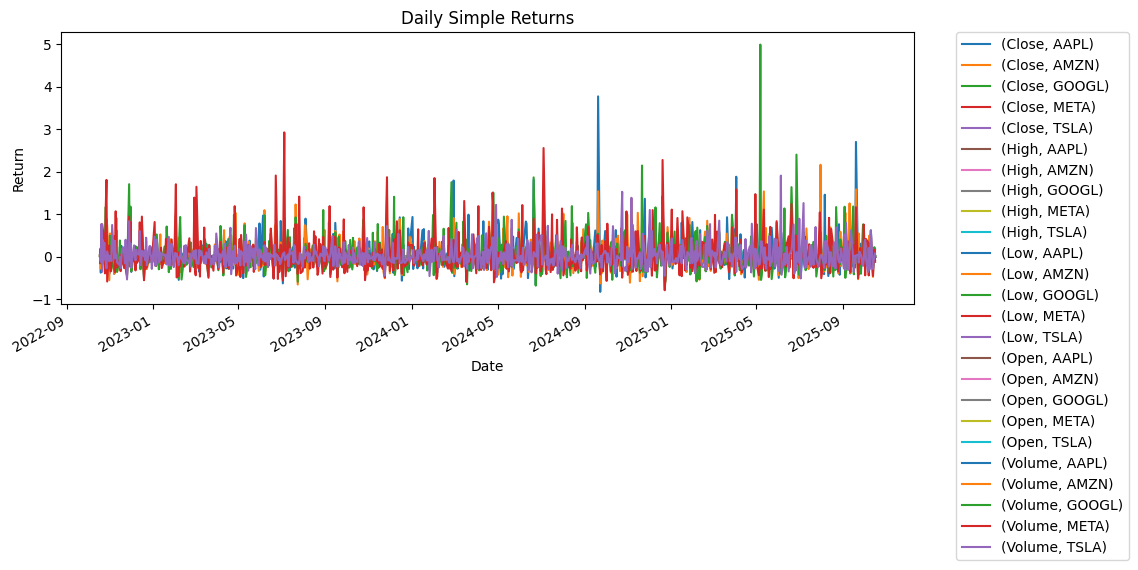

In [20]:
# Plot time series of returns (volatility feeling)

ax = simple_ret.plot(figsize=(11,4), title="Daily Simple Returns")
ax.set_ylabel("Return")
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

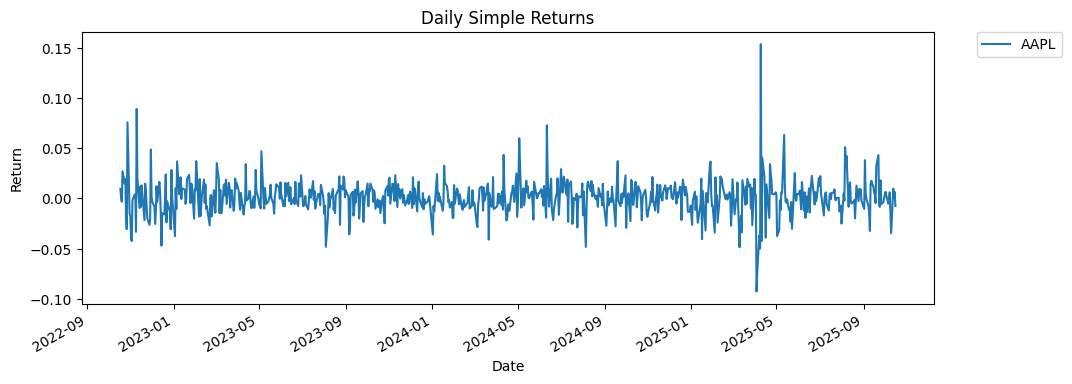

In [33]:
ax2 = simple_ret["Close"]["AAPL"].plot(figsize=(11,4), title="Daily Simple Returns")
ax2.set_ylabel("Return")
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

In [34]:
# Histogram + density + normal fit (one ticker)

ticker = "AAPL"
r = simple_ret[][ticker].dropna()

# Histogram (density=True normalizes area to 1)
plt.figure(figsize=(7,4))
plt.hist(r, bins=60, density=True, alpha=0.6)
plt.title(f"{ticker} - Daily Returns: Histogram + Normal Fit")
plt.xlabel("Daily return")
plt.ylabel("Density")

# Fit normal using sample mean/std
mu, sigma = r.mean(), r.std()
x = np.linspace(r.min()*1.2, r.max()*1.2, 500)
plt.plot(x, norm.pdf(x, mu, sigma), linewidth=2, label= f"Normal fit mu={mu:.4f}, sigma={sigma:.4f}")

plt.legend()
plt.show()

KeyError: 'AAPL'

In [35]:
simple_ret["AAPL"]

KeyError: 'AAPL'

In [ ]:
# Fix the error of accessing the full ticker information